# Table of Contents 

1. Importing Libraries 
2. Importing Dataframe 
3. Data Cleaning
4. The Elbow Technique
5. K-Means Clustering 
6. Visualizations
7. Interpreting Results 
7. Descriptive Statistics 

## 1. Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler 

In [2]:
# This option ensures the graph created are displayed in this notebook without the need to "call" them specifically.

%matplotlib inline

## 2. Importing Dataframe 

In [3]:
# Create a path for quicker import
path = r'C:\Users\emily\OneDrive\Documents\Career Foundry 2022\Data Immersion\Achievement 6'

In [4]:
# Importing dataframe 
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', '2Complete_dataset.csv'), index_col = False)

## 3. Data Cleaning

In [5]:
df.shape

(1084, 13)

In [6]:
df.head()

,Country Rank,Year,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity),Dystopia Residual,Happiness Status
0,1,2015,Switzerland,Western Europe,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517,Happy Country
1,2,2015,Iceland,Western Europe,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702,Happy Country
2,3,2015,Denmark,Western Europe,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492,Happy Country
3,4,2015,Norway,Western Europe,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465,Happy Country
4,5,2015,Canada,North America,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452,Happy Country


In [7]:
# Remove the categorical columns such as Country, Region, Continent, and Happiness Status
# Create a subset to hold the remaining numerical columns
df_subset = df.drop(columns = ['Country', 'Region', 'Happiness Status'])

In [8]:
# Remove 'Country', 'Region', 'Happiness Status' to run the k-means clustering
# Create a subset to hold the remaining numerical columns

df_subset = df.drop(columns = ['Country', 'Region', 'Happiness Status'])

In [9]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Rank                       1084 non-null   int64  
 1   Year                               1084 non-null   int64  
 2   Happiness Score                    1084 non-null   float64
 3   Economy (GDP per Capita)           1084 non-null   float64
 4   Family (Social Support)            1084 non-null   float64
 5   Health (Life Expectancy)           1084 non-null   float64
 6   Freedom (Life Choices)             1084 non-null   float64
 7   Trust (Government Corruption)      1084 non-null   float64
 8   Generosity (Donations to Charity)  1084 non-null   float64
 9   Dystopia Residual                  1084 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 84.8 KB


In [10]:
column2 = ['Country Rank','Year', 'Happiness Score', 'Economy (GDP per Capita)', 'Family (Social Support)', 'Health (Life Expectancy)', 'Freedom (Life Choices)', 'Trust (Government Corruption)', 'Generosity (Donations to Charity)', 'Dystopia Residual']

In [11]:
#Defining Scaler 
scaler = StandardScaler()

In [12]:
#Scaling data subset 
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=column2) 

In [13]:
df_scaled.head()

,Country Rank,Year,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity),Dystopia Residual
0,-1.719728,-1.488281,1.943989,1.189942,0.903649,1.327603,1.542675,2.241341,0.921492,0.785706
1,-1.697380,-1.488281,1.920735,0.954053,1.060335,1.355772,1.300260,-0.039979,2.131993,1.108619
2,-1.675031,-1.488281,1.890326,1.011163,0.936794,1.062006,1.431295,2.764655,1.304672,0.742069
3,-1.652683,-1.488281,1.885854,1.343891,0.846398,1.102248,1.568882,1.791619,1.356924,0.694941
4,-1.630334,-1.488281,1.800887,1.013646,0.822293,1.186756,1.326467,1.505432,2.323583,0.672250


In [14]:
df_subset.head()

,Country Rank,Year,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity),Dystopia Residual
0,1,2015,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517
1,2,2015,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702
2,3,2015,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492
3,4,2015,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465
4,5,2015,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452


## 4. The Elbow Technique 

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\emily\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[-10840.000000000002,
 -7471.033386685573,
 -6364.324417082282,
 -5769.431484360766,
 -5371.663375316659,
 -5031.405029702535,
 -4720.4235843991555,
 -4492.823214298022,
 -4300.476159249295]

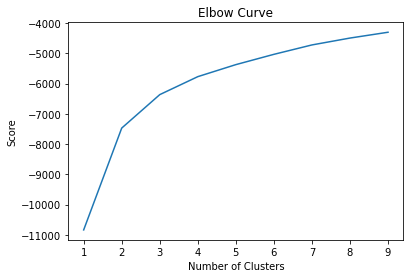

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The results of this elbow curve show that there is a large jump from 2 to 4 on the x-axis, after that the curve plateaus. In this scenario, the optimal cluster count for this analysis is 4. 

## 5. K-Means Clustering 

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [20]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

In [21]:
df_scaled.head()

,Country Rank,Year,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity),Dystopia Residual,clusters
0,-1.719728,-1.488281,1.943989,1.189942,0.903649,1.327603,1.542675,2.241341,0.921492,0.785706,0
1,-1.697380,-1.488281,1.920735,0.954053,1.060335,1.355772,1.300260,-0.039979,2.131993,1.108619,0
2,-1.675031,-1.488281,1.890326,1.011163,0.936794,1.062006,1.431295,2.764655,1.304672,0.742069,0
3,-1.652683,-1.488281,1.885854,1.343891,0.846398,1.102248,1.568882,1.791619,1.356924,0.694941,0
4,-1.630334,-1.488281,1.800887,1.013646,0.822293,1.186756,1.326467,1.505432,2.323583,0.672250,0


In [22]:
df_scaled['clusters'].value_counts()

1    494
2    394
0    196
Name: clusters, dtype: int64

## 6. Visualizations 

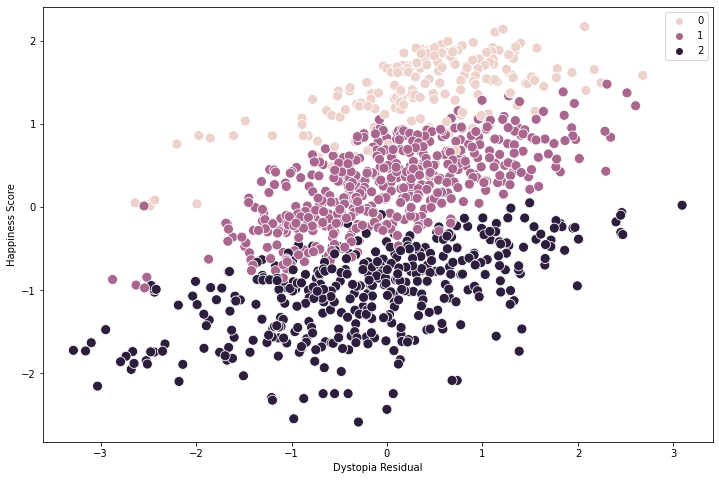

In [23]:
# Plot the clusters for the "Happiness Score" and "Dystopia Residual" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Dystopia Residual'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Dystopia Residual') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

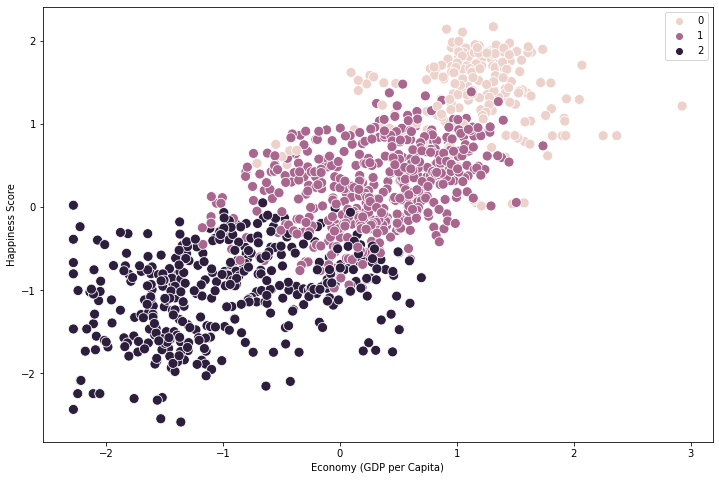

In [35]:
# Plot the clusters for the "Happiness Score" and "Economy (GDP per Capita)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Economy (GDP per Capita)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy (GDP per Capita)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

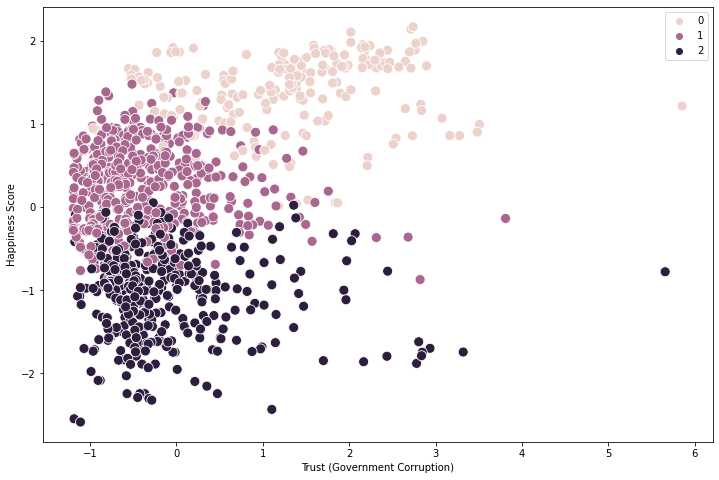

In [25]:
# Plot the clusters for the "Happiness Score" and "Trust (Government Corruption)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Trust (Government Corruption)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trust (Government Corruption)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

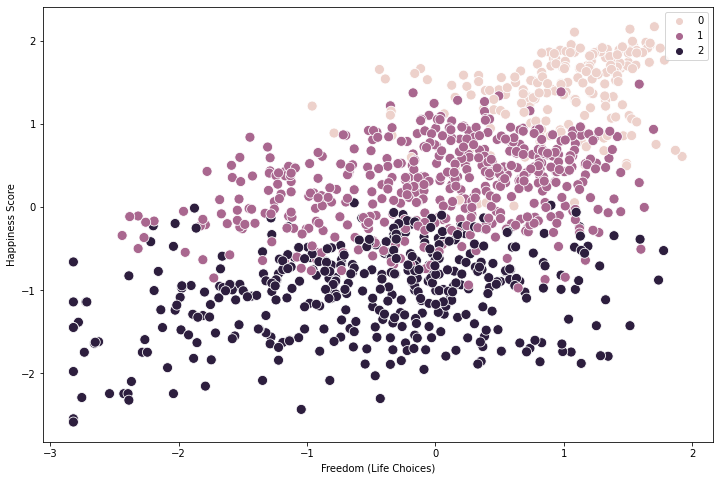

In [26]:
# Plot the clusters for the "Happiness Score" and "Freedom (Life Choices)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['Freedom (Life Choices)'], y=df_scaled['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom (Life Choices)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

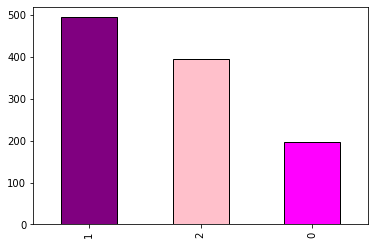

In [31]:
bar = df_scaled['clusters'].value_counts().plot.bar(color=['purple', 'pink','magenta'],edgecolor='black')

## 7. Interpreting Results from Scatterplots


#### Happiness Score vs. Dystopia Residual: The purple cluster (coded as "1" in the legend) represents the unhappy countries. The lower the happiness score the lower the dystopia residual score is and vice versa. A majority of these data points have a dystopia residual score lower than 0. The pink cluster (coded as "2" in the legend) represents the somewhat happy countries. A majority of these data points are plotted between -1 and 0 happiness scores as well as -1 through 1 dystopia residual score. The dark purple cluster (coded as "2" in the legend) represents the happy countries. A majority of these data points are plotted higher than a 1 happiness score and above 0 dystopia residual score. 

#### Happiness Score vs. Economy: The purple cluster (coded as "1" in the legend) is showing that a lower score in economy will equate to an unhappy country. The pink cluster (coded as "0" in the legend) is showing that countries with an economy score lower than 1 are in the somewhat happy country status. The purple cluster (coded as "2" in the legend) is showing that countries with a happiness score above 1 have an economy score higher than 1 equates to a happier country. 

#### Happiness Score vs. Trust Government Corruption: The purple cluster (coded as "1" in the legend) is showing that the unhappy countries do not have much trust in their government. Somewhat happy countries are also within the same range of a Trust score between -1 - 0 (Low trust in government). We see a slight difference in countries with happy countries (Pink cluster) demonstrating slightly more trust in their government with data points varying between 0 - 2.

#### Happiness Score vs. Freedom (Life Choices): This results of this scatterplot were not shocking. The purple cluster (coded as "1" in the legend) is showing the somewhat happy countries have freedom scores that range between -1 through 1. The pink cluster (coded as "0" in the legend) is showing that happy countries have slightly more freedom than those countries with lower happiness scores. The dark purple cluster (coded as "2" in the legend) is showing that unhappy countries dont have differences in Freedom scores in comparison to the purple cluster (Somewhat happy countries) . 

## 8. Descriptive Statistics 

In [28]:
# Create a 'cluster' column based on the clusters for easier interpretation

df_subset.loc[df_scaled['clusters'] == 2, 'cluster'] = 'dark purple'
df_subset.loc[df_scaled['clusters'] == 1, 'cluster'] = 'purple'
df_subset.loc[df_scaled['clusters'] == 0, 'cluster'] = 'pink'

In [29]:
df_subset.groupby('cluster').agg({'Dystopia Residual':['mean', 'median'], 
                           'Economy (GDP per Capita)':['mean', 'median'], 
                           'Trust (Government Corruption)':['mean', 'median'], 
                           'Freedom (Life Choices)':['mean', 'median'] })

Dystopia Residual         Economy (GDP per Capita)         \
                         mean  median                     mean median   
cluster                                                                 
dark purple          1.943185  1.9515                 0.522180  0.488   
pink                 2.268287  2.2950                 1.375444  1.393   
purple               2.085583  2.0695                 1.051698  1.066   

            Trust (Government Corruption)         Freedom (Life Choices)  \
                                     mean  median                   mean   
cluster                                                                    
dark purple                      0.127607  0.0995               0.351178   
pink                             0.303046  0.3085               0.579719   
purple                           0.098117  0.0775               0.434650   

                     
             median  
cluster              
dark purple  0.3770  
pink         0.5915  
purple       0.4535

With these descriptive statistics we can state a few facts: 

The dark purple cluster has the best statistics, the Dystopia Residual has a median score of 2.3 which is larger than the other variables. Economy is the second best variable, which is understandable when relating to a countries happiness factor. 

Freedom (Life Choices) would be the third most valuable statistic in relation to a countries happiness. The average value is 0.54, meaning that someone's freedom within the country will weigh heavily on the countries happiness score. It is important to note that these 4 factors are not the onyl factors that affect a countries happiness score. Looking at these indiviually will not provid

Limitations: 
Some limitations in this dataset are that the dataset is not that large. It will be interesting to see how this data evolves over the next decade. 



In [30]:
# Export the dataset
df_scaled.to_csv(os.path.join (path, 'Data', 'Prepared Data', '2subset_with_3clusters.csv'))